# visualizing dummy data

##dummy data

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1, 2, 3, 4, 5 ]).reshape(-1, 1)
y = np.array([3, 6, 13, 32, 22])

##linear regression

In [77]:
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

##polynomial regression

In [78]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

##plot

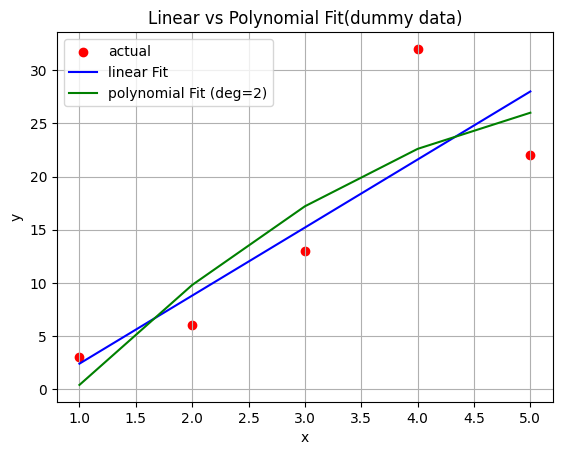

In [79]:
plt.scatter(x, y, color='red', label='actual')
plt.plot(x, y_pred_linear, color='blue',label = 'linear Fit')
plt.plot(x, y_pred_poly, color='green',label = 'polynomial Fit (deg=2)')
plt.title('Linear vs Polynomial Fit(dummy data)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##real dataset:salary prediction

In [80]:
import numpy as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

##load dataset

In [81]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [82]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [83]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


##train-test split

In [84]:
x = df[["Years of Experience"]]
y =  df["Salary"]
x_train, x_test, y_train, y_test = train_test_split(
   x,
   y,
   test_size=0.2,
   random_state=42)

##linear regression

##train linear regression

In [85]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_test)

##matrics

In [86]:
mes_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mes_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("linear regression:")
print("mse:",mse_lin)
print("rmse:",rmse_lin)
print("r2 score:",r2_lin)

linear regression:
mse: 946833177.7094355
rmse: 30770.654489455297
r2 score: 0.6669549610495003


##degree 2

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)
poly2_model = LinearRegression()
poly2_model.fit(x_train_poly2, y_train)
y_pred_poly2 = poly2_model.predict(x_test_poly2)

##degree 4

In [88]:
poly4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)
poly4_model = LinearRegression()
poly4_model.fit(x_train_poly4, y_train)
y_pred_poly4 = poly4_model.predict(x_test_poly4)

In [89]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
poly_model=LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly=poly_model.predict(x_poly)

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming x and y are defined earlier in the notebook
x_train_, x_test_, y_train_, y_test_ = train_test_split(x, y, test_size=0.2, random_state=42)

# Predict on the test set using the degree 4 polynomial model
x_poly4_test = poly4.transform(x_test_)
y_pred_poly4_test = poly4_model.predict(x_poly4_test)

# Calculate metrics for the degree 4 polynomial model
mse_poly4 = mean_squared_error(y_test_, y_pred_poly4_test)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_test_, y_pred_poly4_test)

print("Polynomial Regression (degree 4) Metrics:")
print("Mean Squared Error:", mse_poly4)
print("Root Mean Squared Error:", rmse_poly4)
print("R-squared:", r2_poly4)

Polynomial Regression (degree 4) Metrics:
Mean Squared Error: 720033651.6859531
Root Mean Squared Error: 26833.44278481524
R-squared: 0.7467308484568018


In [91]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x and y are defined earlier in the notebook
x_train_, x_test_, y_train_, y_test_ = train_test_split(x, y, test_size=0.2, random_state=42)

# Calculate metrics for Linear Regression
lin_model = LinearRegression()
lin_model.fit(x_train_,y_train_)
y_pred_lin = lin_model.predict(x_test_)
mse_lin = mean_squared_error(y_test_,y_pred_lin)
rmse_lin=np.sqrt(mse_lin)
r2_lin=lin_model.score(x_test_,y_test_)

# Calculate metrics for Polynomial Regression (degree 2)
poly2 = PolynomialFeatures(degree=2)
x_poly2_train = poly2.fit_transform(x_train_)
x_poly2_test = poly2.transform(x_test_)
poly2_model = LinearRegression()
poly2_model.fit(x_poly2_train, y_train_)
y_pred_poly2_test = poly2_model.predict(x_poly2_test)
mse_poly2 = mean_squared_error(y_test_,y_pred_poly2_test)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y_test_,y_pred_poly2_test)

# Calculate metrics for Polynomial Regression (degree 4)
poly4 = PolynomialFeatures(degree=4)
x_poly4_train = poly4.fit_transform(x_train_)
x_poly4_test = poly4.transform(x_test_)
poly4_model = LinearRegression()
poly4_model.fit(x_poly4_train, y_train_)
y_pred_poly4_test = poly4_model.predict(x_poly4_test)
mse_poly4 = mean_squared_error(y_test_, y_pred_poly4_test)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_test_, y_pred_poly4_test)


metrics_df = pd.DataFrame({
    "model": ["Linear Regression", "Polynomial Regression (degree 2)", "Polynomial Regression (degree 4)"],
    "MSE": [mse_lin, mse_poly2, mse_poly4],
    "RMSE": [rmse_lin, rmse_poly2,rmse_poly4],
    "R2": [r2_lin, r2_poly2,r2_poly4]
})
print(metrics_df)

                              model           MSE          RMSE        R2
0                 Linear Regression  9.468332e+08  30770.654489  0.666955
1  Polynomial Regression (degree 2)  7.268572e+08  26960.290238  0.744331
2  Polynomial Regression (degree 4)  7.200337e+08  26833.442785  0.746731


In [92]:
x_range = np.linspace(x.min(),x.max(),100).reshape(-1,1)
X_range_df = pd.DataFrame(x_range,columns=["Years of Experience"])
poly2 = PolynomialFeatures(degree=2)
poly4 = PolynomialFeatures(degree=4)
x_poly2_fitted = poly2.fit_transform(x)
x_poly4_fitted = poly4.fit_transform(x)
x_range_poly2 = poly2.transform(X_range_df)
x_range_poly4 = poly4.transform(X_range_df)
poly2_model = LinearRegression()
poly2_model.fit(x_poly2_fitted, y)
poly4_model = LinearRegression()
poly4_model.fit(x_poly4_fitted, y)
lin_model = LinearRegression()
lin_model.fit(x,y)
y_range_lin = lin_model.predict(X_range_df)
y_range_poly2 = poly2_model.predict(x_range_poly2)
y_range_poly4 = poly4_model.predict(x_range_poly4)

##load and explore the dataset

In [93]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/salary/_Data.csv')
df.info()

HTTPError: HTTP Error 404: Not Found

In [ ]:
df.info()

In [94]:
df.isnull().sum()

,0
Years of Experience,0
Salary,0


In [95]:
df.dropna(inplace=True)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


##feature scaling(very important for SVR)

In [97]:
from sklearn.preprocessing import StandardScaler

x = df[['Years of Experience']]
y = df['Salary']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [98]:
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

##train SVR model (RBF kernel)

In [99]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(x_scaled, y_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

##predictions and inverse scaling

In [100]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [101]:
y_pred_scaled

array([-0.44592988, -0.95928686,  1.16101663, ..., -0.71943669,
        1.02434885, -1.33765207])

In [102]:
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

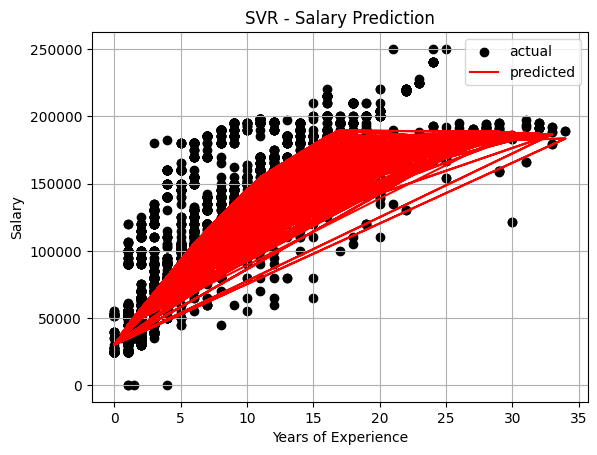

In [103]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='black', label='actual')
plt.plot(x, y_pred, color='red', label='predicted')
plt.title("SVR - Salary Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

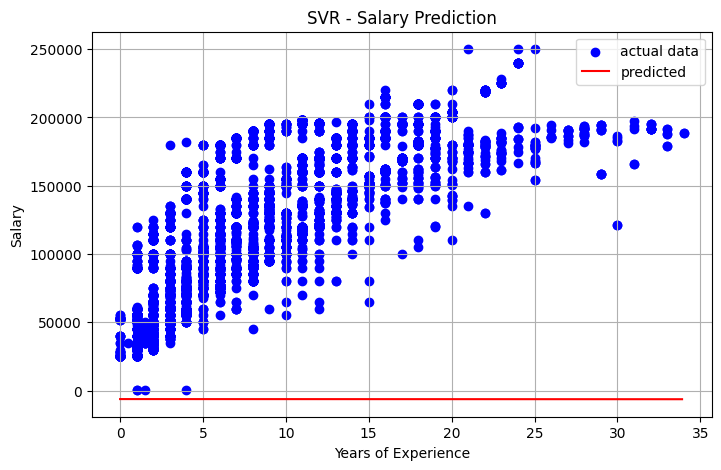

In [106]:
import numpy as np
import matplotlib.pyplot as plt

x_grid = np.arange(min(x.values.ravel()), max(x.values.ravel()), 0.1)
x_grid = x_grid.reshape(-1,1)
x_grid_scaled = scaler.transform(x_grid)
y_grid_pred_scaled = svr.predict((x_grid_scaled))
y_grid_pred = scaler.inverse_transform(y_grid_pred_scaled.reshape(-1, 1))

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='actual data')
plt.plot(x_grid, y_grid_pred, color='red', label='predicted')
plt.title("SVR - Salary Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

##try diff c and epsilon values

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


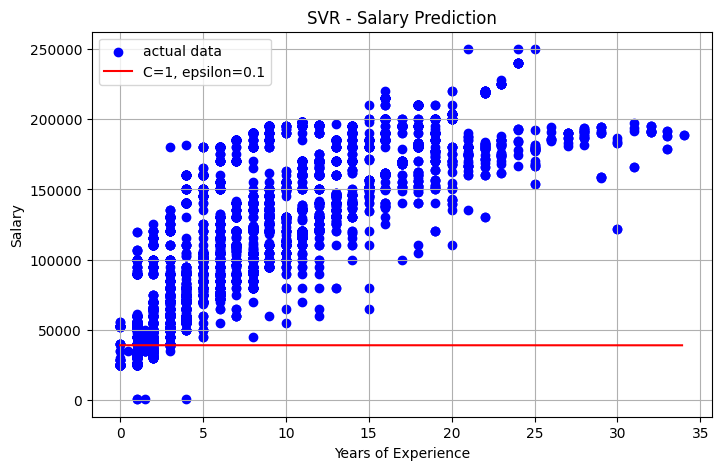

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


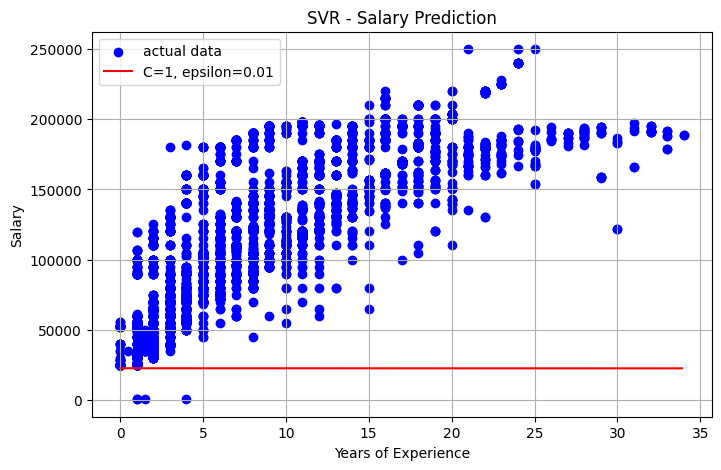

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


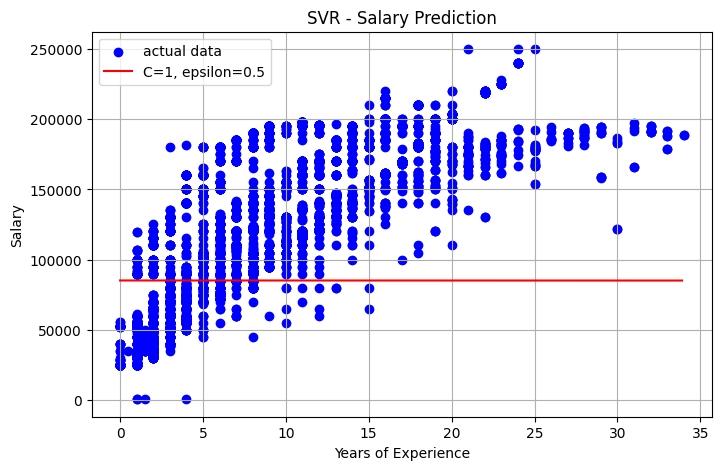

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


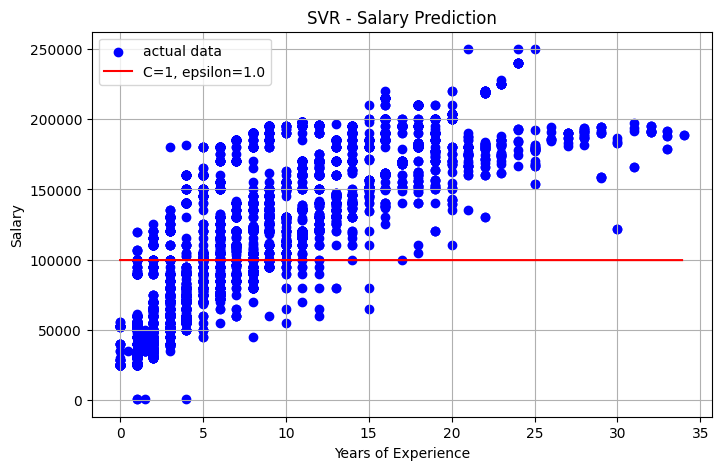

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


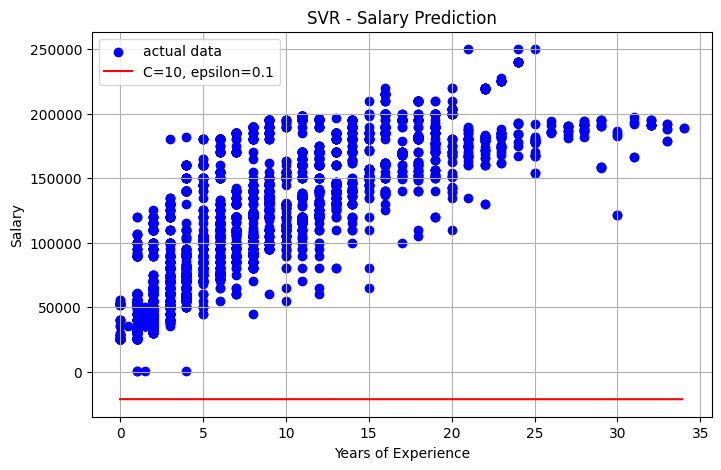

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


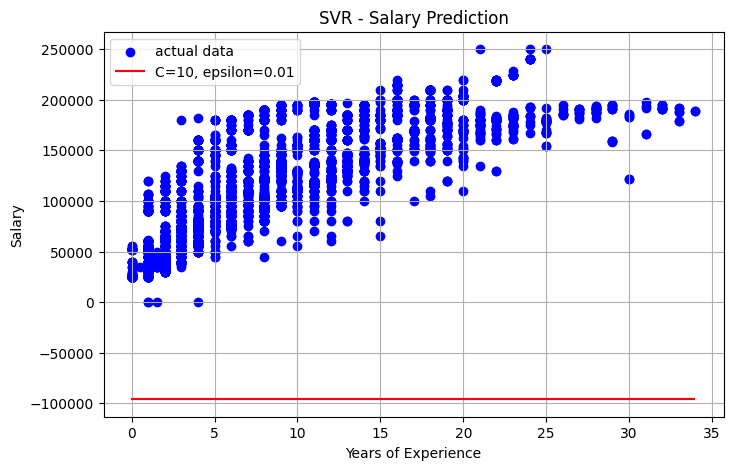

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


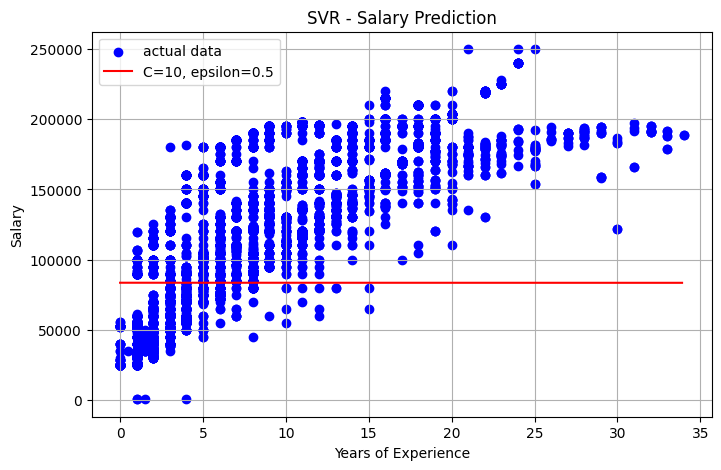

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


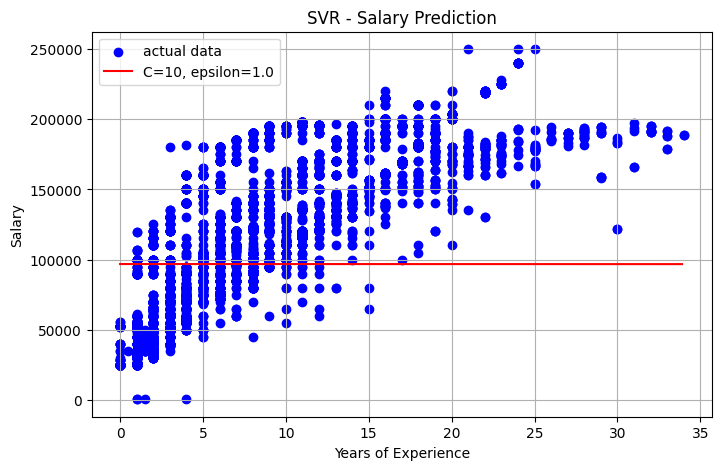

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


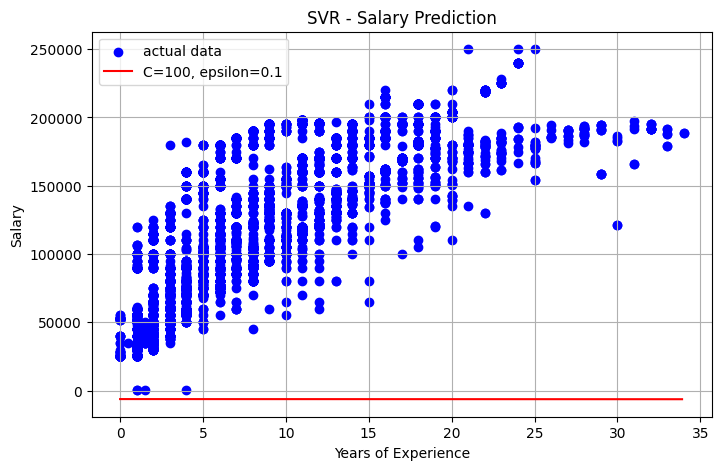

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


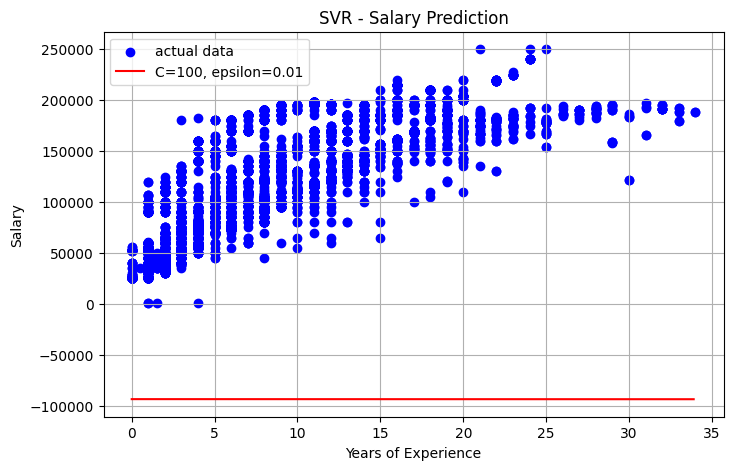

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


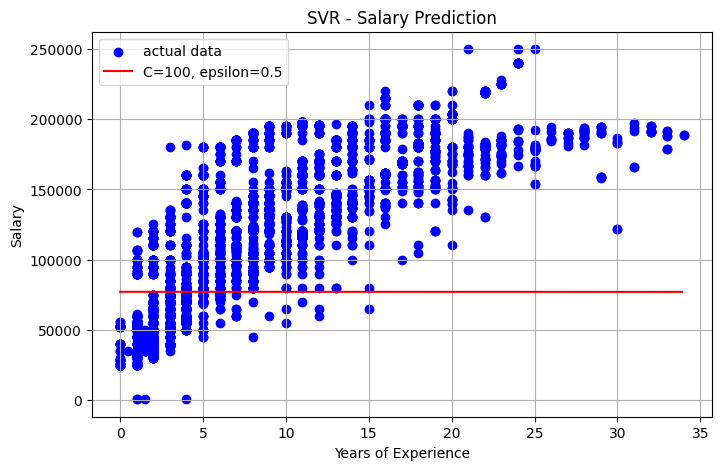

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


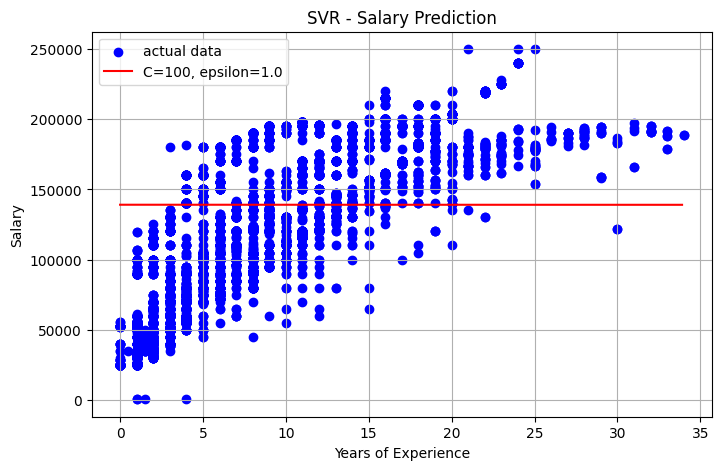

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


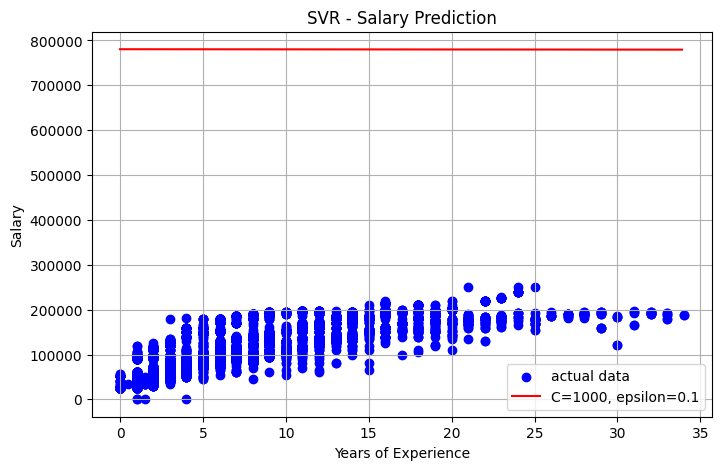

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


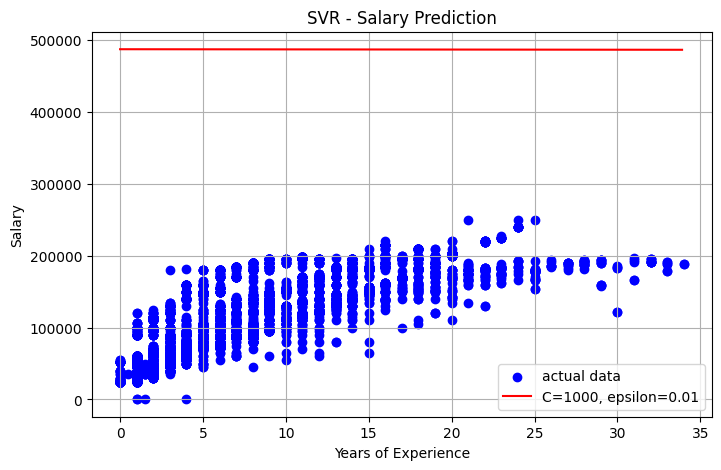

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


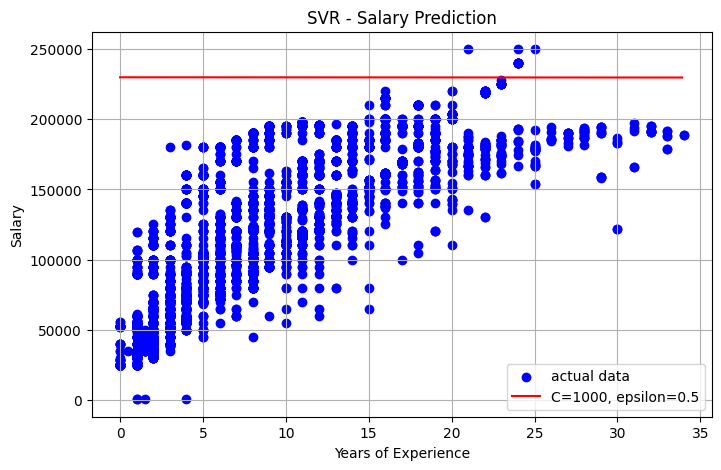

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


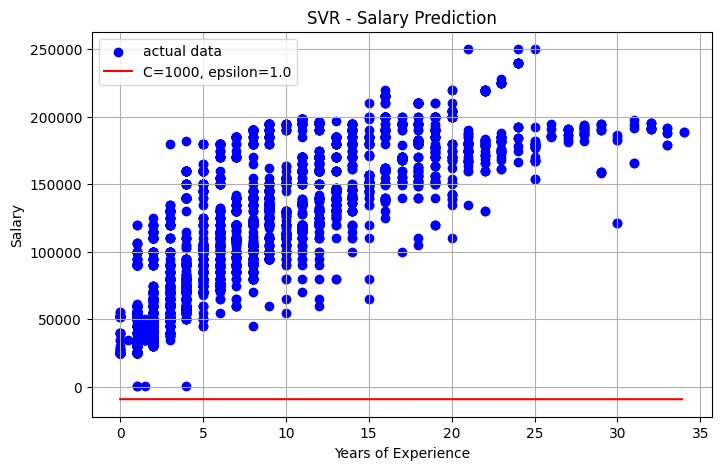

In [108]:
C_values = [1, 10, 100, 1000]
epsilon_values = [0.1, 0.01, 0.5, 1.0]

x_grid = np.arange(min(x.values.ravel()), max(x.values.ravel()), 0.1)
x_grid = x_grid.reshape(-1, 1)
x_grid_scaled = scaler.transform(x_grid)
for c in C_values:
    for epsilon in epsilon_values:
        svr = SVR(kernel='rbf', C=c, epsilon=epsilon)
        svr.fit(x_scaled, y_scaled)

        y_grid_pred_scaled = svr.predict(x_grid_scaled)
        y_grid_pred = scaler.inverse_transform(y_grid_pred_scaled.reshape(-1, 1))

        plt.figure(figsize=(8, 5))
        plt.scatter(x, y, color='blue', label='actual data')
        plt.plot(x_grid, y_grid_pred, color='red', label=f'C={c}, epsilon={epsilon}')
        plt.title("SVR - Salary Prediction")
        plt.xlabel("Years of Experience")
        plt.ylabel("Salary")
        plt.grid(True)
        plt.legend()
        plt.show()